# Data Cleaning

Lets write some code to demonstrate how to handle missing values, outliers, duplicates, data inconsistencies, data validation, and data integrity issues in a house price dataset.

# Handling Missing Values:

Missing values can occur due to various reasons, such as data collection errors or incomplete records. Here's a more detailed explanation of the missing values section:



In [5]:
# Handling Missing Values:

# Import pandas library
import pandas as pd

!wget https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv


# Load the house price dataset
house_data = pd.read_csv('kaggle-house-price-data-set.csv')

print(house_data['SalePrice'],'\n')


--2024-04-22 14:25:06--  https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘kaggle-house-price-data-set.csv.1’

kaggle-house-price- 100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2024-04-22 14:25:06 (12.1 MB/s) - ‘kaggle-house-price-data-set.csv.1’ saved [460676/460676]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64 



First load the house price dataset into a pandas DataFrame called house_data stored in a CSV file named 'house_price_dataset.csv'.

## isnull() and Sum()

Use the isnull() function to identify missing values in the dataset. The isnull() function returns a DataFrame of the same shape as house_data, where each cell contains either True if the value is missing or False if the value is not missing. By applying the sum() function to the resulting DataFrame, we can calculate the total number of missing values for each column.


The output of missing_values will display the number of missing values for each column in the dataset. This information helps us understand the extent of missing data in the dataset and identify which columns are affected.



In [6]:
# Check for missing values
missing_values = house_data.isnull().sum()

print(missing_values,'\n') ## Difficult to tell which columns have mising values

# Find columns with missing values greater than zero
columns_with_missing = house_data.columns[house_data.isnull().sum() > 0]

# Print the columns with missing values greater than zero
for column in columns_with_missing:
    print(f"Column '{column}' has {house_data[column].isnull().sum()} missing value(s).")


## Drop the rows with missing values
house_data_clean = house_data.dropna()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64 

Column 'LotFrontage' has 259 missing value(s).
Column 'Alley' has 1369 missing value(s).
Column 'MasVnrType' has 872 missing value(s).
Column 'MasVnrArea' has 8 missing value(s).
Column 'BsmtQual' has 37 missing value(s).
Column 'BsmtCond' has 37 missing value(s).
Column 'BsmtExposure' has 38 missing value(s).
Column 'BsmtFinType1' has 37 missing value(s).
Column 'BsmtFinType2' has 38 missing value(s).
Column 'Electrical' has 1 missing value(s).
Column 'FireplaceQu' has 690 missing value(s).
Column 'GarageType' has 81 missing value(s).
Column 'GarageYrBlt' has 81 missing value(s).
Column 'GarageFinish' has 81 missing value(s).
Column 'GarageQual' has 81 missing value(s).
Column 'GarageCond' has 81 missing value(s).
Column 'PoolQC' h

## Dealing with Missing Values. Dropping or Filling Values

In this code snippet, we use the dropna() function to remove rows with missing values from the dataset. By default, dropna() drops any row that contains at least one missing value. The resulting DataFrame, house_data_clean, will only contain rows where all values are present.

Alternatively, if you want to impute (fill) the missing values instead of dropping them, you can use techniques like mean imputation, median imputation, or interpolation:

python


In [7]:
import numpy as np

# Store columns with missing values before imputation
columns_with_missing_before = house_data.columns[house_data.isnull().any()].tolist()


print(house_data)

# Impute missing values with the column's mean,, but only for numeric columns
# house_data_imputed = house_data.fillna(house_data.mean())

# Impute missing values with the column's mean, but only for numeric columns
house_data_imputed = house_data.select_dtypes(include=[np.number])  # Only consider numeric columns


# Store columns with missing values after imputation
columns_with_missing_after = house_data_imputed.columns[house_data_imputed.isnull().any()].tolist()

# Print columns with missing values before and after imputation
print("Columns with missing values before imputation:", columns_with_missing_before)
print("\nColumns with missing values after imputation:", columns_with_missing_after,'\n')



        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

We still have columns with missing data, why?

The fillna method in pandas is primarily designed to fill missing values in numeric columns. When you use fillna(house_data.mean()), it calculates the mean (average) for each numeric column in the DataFrame house_data and then fills missing values in those columns with the corresponding mean value. It doesn't affect non-numeric (e.g., string) columns because it doesn't make sense to calculate a mean for non-numeric data.

If you want to fill missing values in non-numeric (e.g., string) columns, we need to use different strategies, such as filling with a specific value (e.g., "Unknown" or "N/A") or using the mode (most common value) for categorical data.

Lets give this a shot:


In [8]:
# Impute missing non-numeric data with the most common value (mode)
for column in columns_with_missing_after:

    most_common_value = house_data[column].mode().values[0]
    ## get  the most common value using mode function
    print(column, ' : ', most_common_value,'\n')
    house_data_imputed[column].fillna(most_common_value, inplace=True)

# Store columns with missing values after imputation
columns_with_missing_after_all = house_data_imputed.columns[house_data_imputed.isnull().any()].tolist()

# Print the DataFrame after imputation
print("\nColumns with missing values after imputation:", columns_with_missing_after_all,'\n')

LotFrontage  :  60.0 

MasVnrArea  :  0.0 

GarageYrBlt  :  2005.0 


Columns with missing values after imputation: [] 



Use the fillna( ) function is used to fill missing values with the mean of each column. You can replace house_data.mean() with other imputation strategies based on the characteristics of your dataset.

## Dealing with Outliers:

Daling with outliers is an important step in data cleaning and analysis. Outliers are data points that significantly deviate from the overall pattern of the dataset.

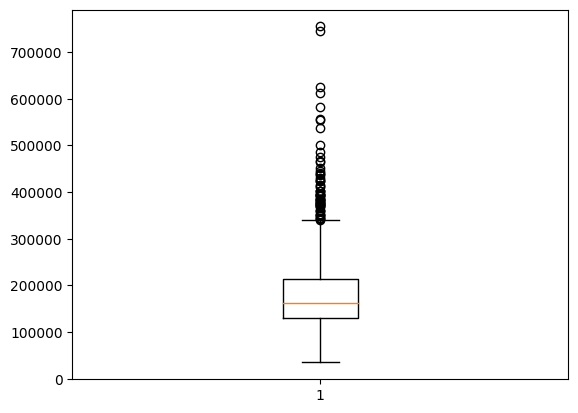

In [9]:
# Dealing with Outliers:

# Import matplotlib.pyplot library for visualization
import matplotlib.pyplot as plt

# Plot a boxplot of the sales prices
plt.boxplot(house_data['SalePrice'])
plt.show()


 Use the boxplot() function from the matplotlib.pyplot library to visualize the distribution of the 'SalesPrice' column in the house price dataset. A box plot displays the quartiles (25th, 50th, and 75th percentiles), along with any potential outliers. This visualization helps identify the presence of outliers in the data.

In [10]:
# Remove outliers based on statistical thresholds
Q1 = house_data['SalePrice'].quantile(0.25)
Q3 = house_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
house_data_clean = house_data[(house_data['SalePrice'] >= Q1 - 1.5*IQR) & (house_data['SalePrice'] <= Q3 + 1.5*IQR)]



Lets calculate the Interquartile Range (IQR), which is the difference between the third quartile (Q3) and the first quartile (Q1) and utlize a multiplier of 1.5 as the threshold for detecting outliers.

Next, we define the lower and upper bounds for identifying outliers based on the IQR. Data points below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) are considered potential outliers.

The code filters the 'SalesPrice' column in the house price dataset using these bounds. By creating a boolean mask (house_data['SalesPrice'] >= Q1 - 1.5*IQR) & (house_data['SalesPrice'] <= Q3 + 1.5*IQR), only the data points within the specified range are selected.

The resulting DataFrame, house_data_clean, will exclude the potential outliers based on the statistical thresholds defined by the IQR method.



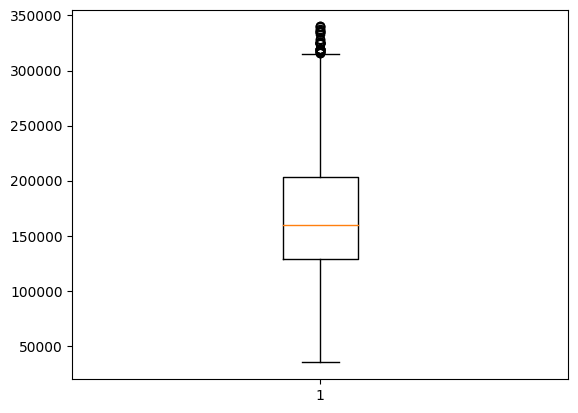

In [11]:
# Plot a boxplot of the sales prices
plt.boxplot(house_data_clean['SalePrice'])
plt.show()

## Handling Duplicates

Use the duplicated() function from pandas to identify duplicate rows in the house_data DataFrame. By calling house_data.duplicated(), a boolean mask is generated where True indicates a duplicate row and False indicates a unique row. We then use this mask to index the DataFrame and select the duplicate rows.

We don't have any duplicate rows in our dataset so we have to create some! To duplicate the first 5 rows of a DataFrame and insert them into the DataFrame, you can use the pd.concat() function to concatenate the DataFrame with itself, taking the first 5 rows.  

The resulting DataFrame, duplicate_rows, contains the duplicate records found in the dataset. You can inspect this DataFrame to understand the nature and extent of the duplicates.

In [12]:
# Print row count before duplication
print("\n Row count before duplication:", len(house_data))

# Duplicate the first 5 rows and insert them
duplicated_rows = house_data.head(5)
house_data = pd.concat([house_data, duplicated_rows], ignore_index=True)

# Print row count after duplication
print("\n Row count after duplication:", len(house_data), '\n')

# Find duplicate records based on all columns
duplicate_rows = house_data[house_data.duplicated()]

# Display the duplicated rows
#print("Duplicated Rows:")
#print(duplicate_rows)

# Drop the duplicate rows
house_data = house_data.drop_duplicates()

# Print row count after duplication
print("\n Row count after dropping duplication:", len(house_data), '\n')

# Remove duplicates based on specific columns
#house_data_clean = house_data.drop_duplicates(subset=['Street', 'Alley', 'LotShape'], keep='first')


 Row count before duplication: 1460

 Row count after duplication: 1465 


 Row count after dropping duplication: 1460 



In this code snippet, we use the drop_duplicates() function to remove duplicate rows based on specific columns in the house_data DataFrame. The subset parameter specifies the columns to consider when identifying duplicates. In this example, we consider the 'Address', 'Type', and 'Rooms' columns to determine duplicates.

By default, drop_duplicates() keeps the first occurrence of each unique row and removes subsequent duplicates. The keep parameter is set to 'first' to retain the first occurrence. You can also choose 'last' to keep the last occurrence or False to remove all duplicates.

The resulting DataFrame, house_data_clean, will contain only the unique records after removing duplicates based on the specified columns.

#  Addressing Data Inconsistencies:
Next lets address inconsistencies in the 'Type' and 'Address' columns of the house_data DataFrame.

We can apply string manipulation functions to standardize the values to a desired format. In this example, we use the lower() function to convert all values in the 'Type' column to lowercase, ensuring consistency in case. Similarly, we use the title() function to capitalize the first letter of each word in the 'Address' column, which helps maintain consistent formatting.

In [13]:
# Addressing Data Inconsistencies:

# Lets find the most common value (mode) for each column
for column in house_data:
    most_common_value = house_data[column].mode().values[0]
    ## get  the most common value using mode function
    print(column, ' : ', most_common_value,'\n')


# Standardize values using string manipulation functions
house_data['BldgType'] = house_data['BldgType'].str.lower()
house_data['HouseStyle'] = house_data['HouseStyle'].str.title()

# Correct inconsistent values based on domain knowledge
house_data.loc[house_data['BedroomAbvGr'] > 100, 'BedroomAbvGr'] = 10

Id  :  1 

MSSubClass  :  20 

MSZoning  :  RL 

LotFrontage  :  60.0 

LotArea  :  7200 

Street  :  Pave 

Alley  :  Grvl 

LotShape  :  Reg 

LandContour  :  Lvl 

Utilities  :  AllPub 

LotConfig  :  Inside 

LandSlope  :  Gtl 

Neighborhood  :  NAmes 

Condition1  :  Norm 

Condition2  :  Norm 

BldgType  :  1Fam 

HouseStyle  :  1Story 

OverallQual  :  5 

OverallCond  :  5 

YearBuilt  :  2006 

YearRemodAdd  :  1950 

RoofStyle  :  Gable 

RoofMatl  :  CompShg 

Exterior1st  :  VinylSd 

Exterior2nd  :  VinylSd 

MasVnrType  :  BrkFace 

MasVnrArea  :  0.0 

ExterQual  :  TA 

ExterCond  :  TA 

Foundation  :  PConc 

BsmtQual  :  TA 

BsmtCond  :  TA 

BsmtExposure  :  No 

BsmtFinType1  :  Unf 

BsmtFinSF1  :  0 

BsmtFinType2  :  Unf 

BsmtFinSF2  :  0 

BsmtUnfSF  :  0 

TotalBsmtSF  :  0 

Heating  :  GasA 

HeatingQC  :  Ex 

CentralAir  :  Y 

Electrical  :  SBrkr 

FstFlrSF  :  864 

SndFlrSF  :  0 

LowQualFinSF  :  0 

GrLivArea  :  864 

BsmtFullBath  :  0 

BsmtHal

Above we also assumed (some abratiralry for this example!) that that the number of rooms in a house should not exceed 10, and any value above that is likely an error.

By using the loc indexer, we filter rows where the number of rooms exceeds 10 and replace those values with the maximum acceptable value of 10. This correction ensures that the 'Rooms' column contains consistent and plausible values.

we demonstrate how to validate and enforce data types and formats for specific columns in the house_data DataFrame.

# Data Validation and Constraints:

Lets validate and enforce data types and formats for specific columns in the house_data DataFrame.

Use the astype() function to convert the data type of the 'Bedroom' column to an integer (int). This step ensures that the 'Bathroom' column contains whole numbers rather than decimal values.

Use the apply() function with a lambda function to format the 'SalesPrice' column. In this example, we apply a format to display the sales prices with two decimal places and commas as thousand separators. This formatting improves the readability and consistency of the 'SalesPrice' values.

In [14]:
# Data Validation and Constraints:

# Check data types and formats
house_data['BedroomAbvGr'] = house_data['BedroomAbvGr'].astype(int)


print(house_data['SalePrice'],'\n')
# First Convert 'SalePrice' column to numeric (ignoring non-numeric values)
house_data['SalePrice'] = pd.to_numeric(house_data['SalePrice'], errors='coerce')

#house_data['SalePrice'] = house_data['SalePrice'].apply(lambda x: '${:,.2f}'.format(x))
print('After \n', house_data['SalePrice'],'\n')



0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64 

After 
 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64 



use custom validation rules to ensure that a particular column adheres to specific constraints. In this example, we define a list called valid_types that contains the allowed dwelling types, such as 'house', 'apartment', and 'townhouse'.

By using the isin() function, we filter the house_data DataFrame based on the values present in the 'Type' column. Only the rows where the 'Type' value is one of the valid types will be included in the house_data_clean DataFrame. This step ensures that the 'Type' column contains only the predefined valid values.

To find the unique values in a specific column, such as the 'BldgType' column of a DataFrame, you can use the unique() method or the value_counts() method in pandas. Here's how to do it:

Using unique():


In [15]:
unique_bldg_types = house_data['BldgType'].unique()
print(unique_bldg_types)

# Implement custom validation rules
valid_types = ['1Fam', '2fmCon', 'Duplex','Twnhs']  #  lets assume TwnhsE is not a valid
house_data_clean = house_data[house_data['BldgType'].isin(valid_types)]

print('\n', house_data_clean['BldgType'].unique())

# Using value_counts() to get both unique values and their counts:
print('\n', house_data_clean['BldgType'].value_counts())

#Handling Data Integrity Issues:



['1fam' '2fmcon' 'duplex' 'twnhse' 'twnhs']

 []

 Series([], Name: count, dtype: int64)


# Exercises

## Exercise 1: Handling Missing Values

You have a DataFrame house_data that contains a dataset with missing values. Your task is to identify the columns with missing values and impute them using the mean of each column.

Here is some starter code

In [ ]:
import pandas as pd

# Load the house price dataset
house_data = pd.read_csv('https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv')


## Exercise 2: Handling Outliers

You have a DataFrame house_data that contains a dataset with potential outliers in the 'SalePrice' column. Your task is to identify and remove these outliers based on statistical thresholds.

Hint. Use quantile(0.25) and quantile(0.75)

## Exercise 3: Handling Duplicates

You have a DataFrame house_data that contains a dataset with duplicate rows. Your task is to identify and remove these duplicate rows based on all columns.